In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
        # Uncomment below line to see the file paths
        # print(os.path.join(dirname, filename))

# Print "done" after the loop finishes
print("done")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

done


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2


# Load VGG19 as the base model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers (initially)
for layer in base_model.layers:
    layer.trainable = False  # Prevents updates during training

# Print model summary to verify architecture
base_model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [3]:

# 🔥 Step 2: Add Fully Connected Layers with Regularization & Dropout
x = Flatten()(base_model.output)
x = Dense(512, activation='relu', kernel_regularizer=l2(0.001))(x)  # L2 Regularization
x = BatchNormalization()(x)  # Normalize activations
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)  # Additional Dropout
x = Dense(1, activation='sigmoid')(x)  # Binary Classification

# Create and Compile Model
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Reduced LR for fine-tuning
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [4]:
# 🔄 Step 3: Data Augmentation to Reduce Overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,   # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Horizontal shifts
    height_shift_range=0.2,  # Vertical shifts
    shear_range=0.2,    # Shearing transformations
    zoom_range=0.2,    # Random zooming
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest',
    validation_split=0.2  # 20% of data for validation
)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/cat-and-dog/training_set/training_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/kaggle/input/cat-and-dog/training_set/training_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/cat-and-dog/test_set/test_set',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [5]:

# 🔄 Step 4: Train the Model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,  # Increased epochs for fine-tuning
    verbose=1
)



Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 135s 597ms/step - accuracy: 0.7434 - loss: 1.7296 - val_accuracy: 0.8651 - val_loss: 1.3156
Epoch 2/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 89s 432ms/step - accuracy: 0.8316 - loss: 1.3560 - val_accuracy: 0.8726 - val_loss: 1.2036
Epoch 3/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 88s 428ms/step - accuracy: 0.8502 - loss: 1.2340 - val_accuracy: 0.8763 - val_loss: 1.1249
Epoch 4/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 88s 423ms/step - accuracy: 0.8552 - loss: 1.1567 - val_accuracy: 0.8570 - val_loss: 1.1013
Epoch 5/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 88s 426ms/step - accuracy: 0.8567 - loss: 1.0964 - val_accuracy: 0.8869 - val_loss: 0.9994
Epoch 6/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 88s 427ms/step - accuracy: 0.8702 - loss: 1.0336 - val_accuracy: 0.8963 - val_loss: 0.9490
Epoch 7/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 89s 430ms/step - accuracy: 0.8700 - loss: 0.9872 - val_accuracy: 0.8632 - val_loss: 0.9524
Epoch 8/15
201/201 ━━━━━━━━━━━━━━━━━━━━ 89s 429ms/step - accuracy: 0.8650 - loss: 0.9517 - va

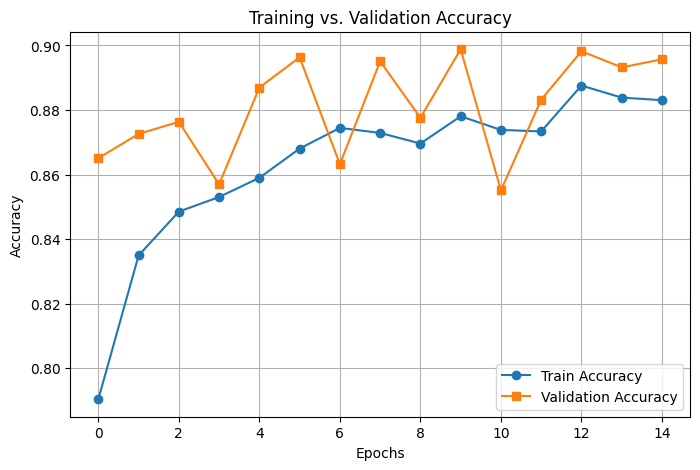

In [6]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [7]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 242ms/step - accuracy: 0.8931 - loss: 0.6870
Test accuracy: 0.9189


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step


<ipython-input-8-9b9e2c0410e0>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = class_labels[int(prediction[0] > 0.5)]  # Binary classification (0: Cat, 1: Dog)


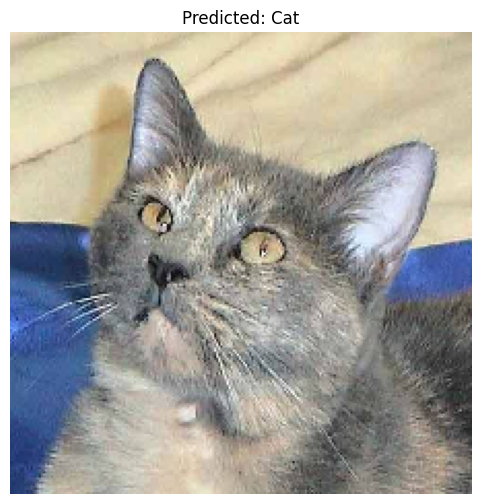

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def classify_image(model, image_path, class_labels=('Cat', 'Dog')):
    """
    Classifies an image as Cat or Dog using the trained VGG19 model.
    
    Parameters:
        model (tf.keras.Model): Trained VGG19 model.
        image_path (str): Path to the input image.
        class_labels (tuple): Class labels (default: ('Cat', 'Dog'))
    
    Returns:
        None: Displays the image with prediction.
    """
    # Load and preprocess image
    img = image.load_img(image_path, target_size=(224, 224))  # Resize to match model input
    img_array = image.img_to_array(img) / 255.0  # Normalize (0-1)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    
    # Make prediction
    prediction = model.predict(img_array)
    predicted_label = class_labels[int(prediction[0] > 0.5)]  # Binary classification (0: Cat, 1: Dog)
    
    # Display image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted: {predicted_label}')
    plt.show()

# Example Usage:
image_path = "/kaggle/input/cat-and-dog/training_set/training_set/cats/cat.1022.jpg"  # Change to your image path
classify_image(model, image_path)
